In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This exam has 10 questions for a 100 points total.
* Q1 is 5 points
* Q2-Q6 are 9 points each
* Q7-Q9 are 12 points each
* Q10 is 14 points

You will analyze a dataset of tennis matches played in 2015. The data is in the file **ATPmatches.csv**. Each tennis match has several sets, and each set has several games. Whoever wins 6 games in a set is the winner of the set. Matches are won by whoever wins enough sets; the number of sets you need to win varies between competitions.

### [Q1 5 points] Read in the data.
The data is in a CSV file named **ATPmatches.csv**

In [2]:
df = pd.read_csv('ATPmatches.csv', dtype=unicode)
print df[:5]

  tourney_id tourney_name surface         winner_name     winner_age  \
0   2015-329        Tokyo    Hard  Stanislas Wawrinka  30.5215605749   
1   2015-329        Tokyo    Hard         Tatsuma Ito  27.3812457221   
2   2015-329        Tokyo    Hard     Austin Krajicek  25.3032169747   
3   2015-329        Tokyo    Hard          Joao Sousa  26.5160848734   
4   2015-329        Tokyo    Hard        Gilles Simon  30.7707049966   

           loser_name      loser_age              score  
0      Radek Stepanek  36.8542094456            7-5 6-3  
1  Yoshihito Nishioka  20.0219028063        3-6 6-0 7-5  
2       Matthew Ebden  27.8576317591  5-7 7-6(4) 7-6(5)  
3     Feliciano Lopez  34.0396988364        6-4 4-6 6-1  
4     Mikhail Youzhny  33.2785763176            6-4 6-4  


### [Q2 9 points] How many games did Roger Federer win?

In [3]:
# Select a series of only winners
series_winners_name = df['winner_name']

# Create a mask that only selects Roger Federe as the winners
mask_winner_rf = (series_winners_name == 'Roger Federer')

# Apply the mask and get the value counts
series_rf_wins = series_winners_name[mask_winner_rf].value_counts()

print series_rf_wins

Roger Federer    63
Name: winner_name, dtype: int64


### [Q3 9 points] Which players have beaten Roger Federer, and how often?

In [4]:
# Select a series of only winners and loser
series_winners_and_losers = df[['winner_name', 'loser_name']]

# Create a mask to filter out only losses by RF
mask_losses_by_rf = (df['loser_name'] == 'Roger Federer')

# Apply the mask to the winners and losers
series_losses_by_rf = series_winners_and_losers[mask_losses_by_rf]

# Do a value counts on the winner_name b/c they beat RF
series_player_beat_rf_counts = series_losses_by_rf['winner_name'].value_counts()

print series_player_beat_rf_counts

Novak Djokovic        5
Nick Kyrgios          1
John Isner            1
Albert Ramos          1
Andreas Seppi         1
Gael Monfils          1
Stanislas Wawrinka    1
Name: winner_name, dtype: int64


### [Q4 9 points] How many players have won at least one game? Lost at least one game?

In [5]:
# Get only unqiue values for winners
list_unique_winners = df['winner_name'].unique()
print(len(list_unique_winners))

# Get only the unique values for the losers
list_unique_losers = df['loser_name'].unique()
print(len(list_unique_winners))

287
287


### [Q5 9 points] Create a column called 'winner_loser' of the form 'winner_name beat loser_name score'.

For example, for the first row, the winner_loser column should have the value 'Stanislas Wawrinka beat Radek Stepanek 7-5 6-3'

In [6]:
# Create a new column through series string concatentation
df['winner_loser'] = df['winner_name'] + ' beat ' + df['loser_name'] + ' ' + df['score']

print df['winner_loser'][:5]

0       Stanislas Wawrinka beat Radek Stepanek 7-5 6-3
1      Tatsuma Ito beat Yoshihito Nishioka 3-6 6-0 7-5
2    Austin Krajicek beat Matthew Ebden 5-7 7-6(4) ...
3          Joao Sousa beat Feliciano Lopez 6-4 4-6 6-1
4            Gilles Simon beat Mikhail Youzhny 6-4 6-4
Name: winner_loser, dtype: object


### [Q6 9 points] Plot the 10 most common scores and their frequencies.
A score of '6-3 6-4' is different from '6-4 6-3'.

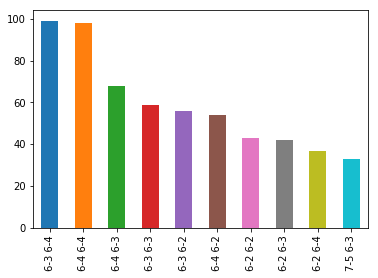

In [7]:
# Get a series of the scores
series_scores = df['score']

# Get the value counts of the scores
series_scores_counts = series_scores.value_counts()

# plots the value counts
series_scores_counts[:10].plot(kind='bar')

### [Q7 12 points] Find the number of matches for each value of the number of sets played.
If a match has a score '6-3 6-4', there were two "sets" played, the first ending with '6-3' and the second with '6-4'. Similarly, if the score was '6-0 6-1 6-2', there were 3 sets played. You want to figure out how many matches had 2 sets, 3 sets, and so on...

In [8]:
# Add a column to the df to count the sets play
def count(score):
    return len(score.split())

df['sets'] = df['score'].map(count)

# Get the value counts for each set
series_set_counts = df['sets'].value_counts()
print series_set_counts

2    1370
3    1213
4     218
5     145
1      11
6       1
Name: sets, dtype: int64


### [Q8 12 points] Among the players who have played at least 50 matches (i.e., there are 50 or more matches where they were either the winner or the loser),  output the top 10 players with the highest winning ratio (i.e., ratio of number of wins to number of games played)

In [9]:
# Create a mask that adds the value counts for both wins and losses
# Makes sure there are at least 50 in total
mask_players_at_least_50_matches = (df['winner_name'].value_counts() + \
                                      df['loser_name'].value_counts() >= 50)


# Get the total number of games played per player with 50+ games
series_games_played_per_player = df['winner_name'].value_counts() + \
                                 df['loser_name'].value_counts()

# Apply the 50+ games played mask
series_games_played_per_player_50 = series_games_played_per_player[mask_players_at_least_50_matches]

# Get the total number of wins per player with at least 50 matches played
series_games_won_per_player_50 = df['winner_name'].value_counts()[mask_players_at_least_50_matches]

# Find the ratio by dividing the series
series_winning_ratio_per_player = (series_games_won_per_player_50 /\
                                  series_games_played_per_player_50).sort_values(ascending=False)

# Print the top 10 players
print series_winning_ratio_per_player[:10]

Novak Djokovic        0.932584
Roger Federer         0.851351
Andy Murray           0.825581
David Ferrer          0.774648
Kei Nishikori         0.763889
Rafael Nadal          0.753086
Stanislas Wawrinka    0.743243
Tomas Berdych         0.721519
Richard Gasquet       0.716667
Jack Sock             0.660377
dtype: float64


### [Q9 12 points] King of each surface.

Figure out which player has won the most games for each surface.

In [10]:
# Create a pivot table with index as winners players and columns as surface
# Add a dummy column
df['DUMMY'] = 1
pt_winners_and_surface = pd.pivot_table(df, index='winner_name', columns='surface',
                                       values='DUMMY', aggfunc=sum)

# Find the max index for each surface
series_king_of_surface = pt_winners_and_surface.idxmax()

print series_king_of_surface

surface
Clay       Rafael Nadal
Grass       Andy Murray
Hard     Novak Djokovic
dtype: object


### [Q10 14 points] Create a new column called 'winner_age_group'. Take the age of the winning player and set the value for the new column to 'Baby' if the age is less than 20, 'Youngster' if the age is at least 20 but less than 25, 'Prime' if it is at least 25 but less than 30, and 'Oldie' otherwise. Figure out how many unique winner_names belong to each winner_age_group.

In [19]:
def ageGroup(age):
    '''Take in an age string and return the string grouping of that age'''
    
    age = float(age)
    
    if age < 20:
        age_group = 'Baby'
    elif age >= 20 and age < 25:
        age_group = 'Youngser'
    elif age >= 25 and age < 30:
        age_group = 'Prime'
    elif age > 30:
        age_group = 'Oldie'
        
    return age_group

# Add the age grouping
df['winner_age_group'] = df['winner_age'].map(ageGroup)

# Drop the duplicates for winners and age group
df_winner_age_group = df[['winner_name', 'winner_age_group']].drop_duplicates()

# Get the value counts of the number of unique winners in each age group
series_unique_winners_age_group_counts = df_winner_age_group['winner_age_group'].value_counts()

print series_unique_winners_age_group_counts

Prime       122
Youngser     91
Oldie        69
Baby         23
Name: winner_age_group, dtype: int64
